In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
le = LabelEncoder()

# Load dataset
df = pd.read_csv("datasets/EPL_Set.csv")

# Inspect data
print(df.head())

  Div      Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  HTR  \
0  E0  14/08/93      Arsenal        Coventry     0     3   A   NaN   NaN  NaN   
1  E0  14/08/93  Aston Villa             QPR     4     1   H   NaN   NaN  NaN   
2  E0  14/08/93      Chelsea       Blackburn     1     2   A   NaN   NaN  NaN   
3  E0  14/08/93    Liverpool  Sheffield Weds     2     0   H   NaN   NaN  NaN   
4  E0  14/08/93     Man City           Leeds     1     1   D   NaN   NaN  NaN   

    Season  
0  1993-94  
1  1993-94  
2  1993-94  
3  1993-94  
4  1993-94  


In [2]:
# Print DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB
None


In [3]:
# Print summary statistics
print(df.describe())


              FTHG         FTAG         HTHG         HTAG
count  9664.000000  9664.000000  8740.000000  8740.000000
mean      1.523903     1.121482     0.685469     0.488444
std       1.301671     1.121667     0.833581     0.710524
min       0.000000     0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000     0.000000
50%       1.000000     1.000000     0.000000     0.000000
75%       2.000000     2.000000     1.000000     1.000000
max       9.000000     8.000000     5.000000     5.000000


In [4]:
df["Home CS"] = np.where(df['FTAG'] == 0, 1, 0)
df["Away CS"] = np.where(df['FTHG'] == 0, 1, 0)
df["Home Win Count"] = np.where(df['FTR'] == 'H', 1, 0)
df["Home Draw Count"] = np.where(df['FTR'] == 'D', 1, 0)
df["Home Loss Count"] = np.where(df['FTR'] == 'A', 1, 0)
df["Away Win Count"] = np.where(df['FTR'] == 'A', 1, 0)
df["Away Draw Count"] = np.where(df['FTR'] == 'D', 1, 0)
df["Away Loss Count"] = np.where(df['FTR'] == 'H', 1, 0)
df["FTHGn"] = df['FTHG'] * -1
df["FTAGn"] = df['FTAG'] * -1

In [5]:
print(df.tail())

     Div      Date     HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
9659  E0  13/05/18    Newcastle    Chelsea     3     0   H   1.0   0.0   H   
9660  E0  13/05/18  Southampton   Man City     0     1   A   0.0   0.0   D   
9661  E0  13/05/18      Swansea      Stoke     1     2   A   1.0   2.0   A   
9662  E0  13/05/18    Tottenham  Leicester     5     4   H   1.0   2.0   A   
9663  E0  13/05/18     West Ham    Everton     3     1   H   1.0   0.0   H   

      ... Home CS  Away CS  Home Win Count  Home Draw Count  Home Loss Count  \
9659  ...       1        0               1                0                0   
9660  ...       0        1               0                0                1   
9661  ...       0        0               0                0                1   
9662  ...       0        0               1                0                0   
9663  ...       0        0               1                0                0   

      Away Win Count  Away Draw Count  Away Loss C

In [6]:
df2 = df.groupby(['Season','HomeTeam'])[['Home Win Count', 'Home Draw Count', 'Home Loss Count', 'FTHG', 'FTAGn', 'Home CS']].apply(sum)
df2 = df2.rename(columns={'Season': 'Season',
                          'HomeTeam': 'Team', 
                          'Home Win Count': 'W',
                          'Home Draw Count': 'D',
                          'Home Loss Count': 'L',
                          'FTHG': 'GF', 
                          'FTAGn':'GA',
                          'Home CS': 'CS'})
df3 = df.groupby(['Season','AwayTeam'])[['Away Win Count', 'Away Draw Count', 'Away Loss Count','FTAG', 'FTHGn', 'Away CS']].apply(sum)
df3 = df3.rename(columns={'Season': 'Season',
                          'AwayTeam': 'Team', 
                          'Away Win Count': 'W',
                          'Away Draw Count': 'D',
                          'Away Loss Count': 'L',
                          'FTAG': 'GF', 
                          'FTHGn':'GA',
                          'Away CS': 'CS'})
print(df2)
print(df3)

                      W  D   L  GF  GA  CS
Season  HomeTeam                          
1993-94 Arsenal      10  8   3  25 -15  11
        Aston Villa   8  5   8  23 -18   9
        Blackburn    14  5   2  31 -11  13
        Chelsea      11  5   5  31 -20   9
        Coventry      9  7   5  23 -17   6
...                  .. ..  ..  ..  ..  ..
2017-18 Swansea       6  3  10  17 -24   5
        Tottenham    13  4   2  40 -16  10
        Watford       7  6   6  27 -31   5
        West Brom     3  9   7  21 -29   6
        West Ham      7  6   6  24 -26   7

[504 rows x 6 columns]
                      W  D   L  GF  GA  CS
Season  AwayTeam                          
1993-94 Arsenal       8  9   4  28 -13  10
        Aston Villa   7  7   7  23 -32   4
        Blackburn    11  4   6  32 -25   5
        Chelsea       2  7  12  18 -33   2
        Coventry      5  7   9  20 -28   7
...                  .. ..  ..  ..  ..  ..
2017-18 Swansea       2  6  11  11 -32   4
        Tottenham    10  4   5

In [7]:
frames = [df2,df3]

In [8]:
result = pd.concat(frames)

In [9]:
print(result)

                      W  D   L  GF  GA  CS
Season  HomeTeam                          
1993-94 Arsenal      10  8   3  25 -15  11
        Aston Villa   8  5   8  23 -18   9
        Blackburn    14  5   2  31 -11  13
        Chelsea      11  5   5  31 -20   9
        Coventry      9  7   5  23 -17   6
...                  .. ..  ..  ..  ..  ..
2017-18 Swansea       2  6  11  11 -32   4
        Tottenham    10  4   5  34 -20   6
        Watford       4  2  13  17 -33   4
        West Brom     3  4  12  10 -27   4
        West Ham      3  6  10  24 -42   3

[1008 rows x 6 columns]


In [10]:
final_table_tmp = result.groupby(['Season','HomeTeam'])[['W', 'D', 'L', 'GF', 'GA','CS']].apply(sum)
final_table= final_table_tmp.reset_index()
final_table.rename({'HomeTeam': 'Team'}, axis=1, inplace=True)
#print(final_table_tmp)
print(final_table)

      Season         Team   W   D   L  GF  GA  CS
0    1993-94      Arsenal  18  17   7  53 -28  21
1    1993-94  Aston Villa  15  12  15  46 -50  13
2    1993-94    Blackburn  25   9   8  63 -36  18
3    1993-94      Chelsea  13  12  17  49 -53  11
4    1993-94     Coventry  14  14  14  43 -45  13
..       ...          ...  ..  ..  ..  ..  ..  ..
499  2017-18      Swansea   8   9  21  28 -56   9
500  2017-18    Tottenham  23   8   7  74 -36  16
501  2017-18      Watford  11   8  19  44 -64   9
502  2017-18    West Brom   6  13  19  31 -56  10
503  2017-18     West Ham  10  12  16  48 -68  10

[504 rows x 8 columns]


In [590]:
final_table['GD'] = final_table['GF'] + final_table['GA']
final_table['Pld'] = final_table['W'] + final_table['D']+ final_table['L']
final_table['Pts'] = (final_table['W'] * 3) + (final_table['D'] * 1) + (final_table['L']* 0)
final_table = final_table.sort_values(['Season','Pts','GD','GF'], ascending = (True, False, False, False))
final_table['Pos'] = final_table.groupby(['Season']).cumcount()+1
final_table = final_table[['Season','Pos','Team','Pld', 'W', 'D','L', 'GF','GA', 'GD','CS','Pts']]
print(final_table.tail(50))

      Season  Pos            Team  Pld   W   D   L   GF  GA  GD  CS  Pts
449  2015-16   11         Everton   38  11  14  13   59 -55   4  10   47
459  2015-16   12         Swansea   38  12  11  15   42 -52 -10   9   47
461  2015-16   13         Watford   38  12   9  17   40 -50 -10  11   45
462  2015-16   14       West Brom   38  10  13  15   34 -48 -14  11   43
448  2015-16   15  Crystal Palace   38  11   9  18   39 -51 -12   8   42
446  2015-16   16     Bournemouth   38  11   9  18   45 -67 -22   7   42
458  2015-16   17      Sunderland   38   9  12  17   48 -62 -14   7   39
454  2015-16   18       Newcastle   38   9  10  19   44 -65 -21   8   37
455  2015-16   19         Norwich   38   9   7  22   39 -67 -28   5   34
445  2015-16   20     Aston Villa   38   3   8  27   27 -76 -49   6   17
467  2016-17    1         Chelsea   38  30   3   5   85 -33  52  16   93
480  2016-17    2       Tottenham   38  26   8   4   86 -26  60  17   86
473  2016-17    3        Man City   38  23   9   6 

In [617]:
### Import csv
# Load dataset
df_EPLs = pd.read_csv("datasets/EPL_standings_2000-2022.csv")
df_EPLs_recent = df_EPLs[df_EPLs['Season'].isin(['2018-19', '2019-20','2020-21','2021-22'])]
df_EPLs_recent = df_EPLs_recent.drop(['Qualification or relegation'], axis=1)
df_EPLs_recent = df_EPLs_recent.assign(CS=None)
df_EPLs_recent = df_EPLs_recent[['Season','Pos','Team','Pld', 'W', 'D','L', 'GF','GA', 'GD','CS','Pts']]
df_EPLs_recent

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,CS,Pts
360,2018-19,1,Manchester City,38,32,2,4,95,23,72,None,98
361,2018-19,2,Liverpool,38,30,7,1,89,22,67,None,97
362,2018-19,3,Chelsea,38,21,9,8,63,39,24,None,72
363,2018-19,4,Tottenham Hotspur,38,23,2,13,67,39,28,None,71
364,2018-19,5,Arsenal,38,21,7,10,73,51,22,None,70
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,None,39
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,None,38
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,None,35
438,2021-22,19,Watford,38,6,5,27,34,77,-43,None,23


In [618]:
EPL_data = [final_table, df_EPLs_recent]
df_EPL_data = pd.concat(EPL_data)
df_EPL_data

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,CS,Pts
10,1993-94,1,Man United,42,27,11,4,80,-38,42,17,92
2,1993-94,2,Blackburn,42,25,9,8,63,-36,27,18,84
11,1993-94,3,Newcastle,42,23,8,11,82,-41,41,15,77
0,1993-94,4,Arsenal,42,18,17,7,53,-28,25,21,71
7,1993-94,5,Leeds,42,18,16,8,65,-39,26,18,70
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,None,39
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,None,38
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,None,35
438,2021-22,19,Watford,38,6,5,27,34,77,-43,None,23


In [619]:
df_EPL_data.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,10.575342,38.301370,14.219178,9.863014,14.219178,50.969178,-36.582192,0.000000,52.520548
std,5.822810,1.056678,5.752462,2.978206,5.405661,15.070529,37.767049,24.989672,16.458991
min,1.000000,38.000000,1.000000,2.000000,0.000000,20.000000,-100.000000,-69.000000,11.000000
25%,6.000000,38.000000,10.000000,8.000000,10.000000,41.000000,-57.000000,-17.000000,41.000000
50%,11.000000,38.000000,13.000000,10.000000,15.000000,47.000000,-49.000000,-5.000000,49.000000
75%,16.000000,38.000000,18.000000,12.000000,18.000000,59.250000,-36.000000,16.000000,63.000000
max,22.000000,42.000000,32.000000,18.000000,29.000000,106.000000,84.000000,79.000000,100.000000


In [621]:
df_EPL_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 10 to 439
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  584 non-null    object
 1   Pos     584 non-null    int64 
 2   Team    584 non-null    object
 3   Pld     584 non-null    int64 
 4   W       584 non-null    int64 
 5   D       584 non-null    int64 
 6   L       584 non-null    int64 
 7   GF      584 non-null    int64 
 8   GA      584 non-null    int64 
 9   GD      584 non-null    int64 
 10  CS      504 non-null    object
 11  Pts     584 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 59.3+ KB


In [622]:
### Import csv
# Load dataset
df_ETQ = pd.read_csv("datasets/ETQ History.csv")
df_ETQ.drop('Season', axis=1, inplace=True)
df_ETQ

,Club,PLQ Season
0,None entered,NaN
1,Manchester United,1955-56
2,Manchester United,1956-57
3,Manchester United,1957-58
4,Wolverhampton Wanderers,1957-58
...,...,...
139,Chelsea,2019-20
140,Manchester United,2020-21
141,Chelsea,2020-21
142,Manchester City,2020-21


In [626]:
df_ETQu = pd.DataFrame(df_ETQ['Club'].unique(), columns=['Original_ETQ_Name'])
df_finaltableu = pd.DataFrame(df_EPL_data['Team'].unique(), columns=['Original_final_table_Name'])
df_ETQu

,Original_ETQ_Name
0,None entered
1,Manchester United
2,Wolverhampton Wanderers
3,Burnley
4,Tottenham Hotspur
5,Ipswich Town
6,Everton
7,Liverpool
8,Manchester City
9,Leeds United


In [627]:
df10 = pd.merge(df_finaltableu, df_ETQu, left_on=['Original_final_table_Name'], right_on=['Original_ETQ_Name'], how='right')
df10

,Original_final_table_Name,Original_ETQ_Name
0,NaN,None entered
1,Manchester United,Manchester United
2,Wolverhampton Wanderers,Wolverhampton Wanderers
3,Burnley,Burnley
4,Tottenham Hotspur,Tottenham Hotspur
5,NaN,Ipswich Town
6,Everton,Everton
7,Liverpool,Liverpool
8,Manchester City,Manchester City
9,Leeds United,Leeds United


In [628]:
club_team_dict = {'Derby County': 'Derby',
                  'Ipswich Town': 'Ipswich',
                  'Leeds United': 'Leeds',
                  'Manchester United': 'Man United',
                  'Manchester City': 'Man City',
                  "Nottingham Forest": "Nott'm Forest",
                  'Blackburn Rovers': 'Blackburn',
                  'Tottenham Hotspur': 'Tottenham',
                  'Newcastle United': 'Newcastle',
                  'Leicester City': 'Leicester',
                  'Wolverhampton Wanderers': 'Wolves'}

In [629]:
df_ETQu['Original_ETQ_Name_mapped']= ''

# Iterate over Champions League Season and add appropriate Premier League Qualification season 
for i,j in  df_ETQu.iterrows():
    if df_ETQu['Original_ETQ_Name'][i] in club_team_dict.keys():
        df_ETQu['Original_ETQ_Name_mapped'][i] = club_team_dict[df_ETQu['Original_ETQ_Name'][i]]
    else:
        df_ETQu['Original_ETQ_Name_mapped'][i] = df_ETQu['Original_ETQ_Name'][i]


In [630]:
df10 = pd.merge(df_finaltableu, df_ETQu, left_on=['Original_final_table_Name'], right_on=['Original_ETQ_Name_mapped'], how='right')
df10

,Original_final_table_Name,Original_ETQ_Name,Original_ETQ_Name_mapped
0,NaN,None entered,None entered
1,Man United,Manchester United,Man United
2,Wolves,Wolverhampton Wanderers,Wolves
3,Burnley,Burnley,Burnley
4,Tottenham,Tottenham Hotspur,Tottenham
5,Ipswich,Ipswich Town,Ipswich
6,Everton,Everton,Everton
7,Liverpool,Liverpool,Liverpool
8,Man City,Manchester City,Man City
9,Leeds,Leeds United,Leeds


In [631]:
name_club_map_d={}

# Iterate over column names & create dictionary
for i,j in df_ETQu.iterrows():
   name_club_map_d[df_ETQu['Original_ETQ_Name'][i]] = df_ETQu['Original_ETQ_Name_mapped'][i]
print(name_club_map_d)

{'None entered': 'None entered', 'Manchester United': 'Man United', 'Wolverhampton Wanderers': 'Wolves', 'Burnley': 'Burnley', 'Tottenham Hotspur': 'Tottenham', 'Ipswich Town': 'Ipswich', 'Everton': 'Everton', 'Liverpool': 'Liverpool', 'Manchester City': 'Man City', 'Leeds United': 'Leeds', 'Arsenal': 'Arsenal', 'Derby County': 'Derby', 'Nottingham Forest': "Nott'm Forest", 'Aston Villa': 'Aston Villa', 'Banned': 'Banned', 'Blackburn Rovers': 'Blackburn', 'Newcastle United': 'Newcastle', 'Chelsea': 'Chelsea', 'Leicester City': 'Leicester'}


In [632]:
df_ETQ['ETQ_Name_mapped']= ''

# Iterate over Champions League Season and add appropriate Premier League Qualification season 
for i,j in df_ETQ.iterrows():
    df_ETQ['ETQ_Name_mapped'][i] = name_club_map_d[df_ETQ['Club'][i]]

In [633]:
df_ETQ

,Club,PLQ Season,ETQ_Name_mapped
0,None entered,NaN,None entered
1,Manchester United,1955-56,Man United
2,Manchester United,1956-57,Man United
3,Manchester United,1957-58,Man United
4,Wolverhampton Wanderers,1957-58,Wolves
...,...,...,...
139,Chelsea,2019-20,Chelsea
140,Manchester United,2020-21,Man United
141,Chelsea,2020-21,Chelsea
142,Manchester City,2020-21,Man City


In [635]:
final_table_merged = pd.merge(df_EPL_data, df_ETQ, left_on=['Season','Team'], right_on=['PLQ Season','ETQ_Name_mapped'], how='left')
#df9[50:100]
#final_table_merged[final_table_merged['Club'].notna()][0:50]

In [636]:
ECLQ_Flag = pd.notna(final_table_merged['ETQ_Name_mapped'])
final_table_merged['ECLQ_Flag'] = ECLQ_Flag

final_table_merged['Team_le'] = final_table_merged['Team']
final_table_merged.Team_le = le.fit_transform(final_table_merged.Team_le)

final_table_merged.drop('Club', axis=1, inplace=True)
final_table_merged.drop('PLQ Season', axis=1, inplace=True)

final_table_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           584 non-null    object
 1   Pos              584 non-null    int64 
 2   Team             584 non-null    object
 3   Pld              584 non-null    int64 
 4   W                584 non-null    int64 
 5   D                584 non-null    int64 
 6   L                584 non-null    int64 
 7   GF               584 non-null    int64 
 8   GA               584 non-null    int64 
 9   GD               584 non-null    int64 
 10  CS               504 non-null    object
 11  Pts              584 non-null    int64 
 12  ETQ_Name_mapped  92 non-null     object
 13  ECLQ_Flag        584 non-null    bool  
 14  Team_le          584 non-null    int32 
dtypes: bool(1), int32(1), int64(9), object(4)
memory usage: 66.7+ KB


In [638]:
final_table_merged.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts,Team_le
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,10.575342,38.301370,14.219178,9.863014,14.219178,50.969178,-36.582192,0.000000,52.520548,30.270548
std,5.822810,1.056678,5.752462,2.978206,5.405661,15.070529,37.767049,24.989672,16.458991,18.579820
min,1.000000,38.000000,1.000000,2.000000,0.000000,20.000000,-100.000000,-69.000000,11.000000,0.000000
25%,6.000000,38.000000,10.000000,8.000000,10.000000,41.000000,-57.000000,-17.000000,41.000000,16.000000
50%,11.000000,38.000000,13.000000,10.000000,15.000000,47.000000,-49.000000,-5.000000,49.000000,30.000000
75%,16.000000,38.000000,18.000000,12.000000,18.000000,59.250000,-36.000000,16.000000,63.000000,48.000000
max,22.000000,42.000000,32.000000,18.000000,29.000000,106.000000,84.000000,79.000000,100.000000,63.000000


In [692]:
lookup_le = final_table_merged[['Team','Team_le']].copy()
lookup_le = lookup_le.drop_duplicates()
print(lookup_le.tail(50))

def myteam_le(my_team):
    tmp = lookup_le.loc[lookup_le['Team'] == my_team]['Team_le']
    return tmp

print(myteam_le('Liverpool'))
print(myteam_le('Man City'))

                        Team  Team_le
14                 Tottenham       53
15                  Man City       31
16                   Everton       20
17               Southampton       48
18                   Ipswich       25
19          Sheffield United       46
20                    Oldham       42
21                   Swindon       52
24             Nott'm Forest       41
40            Crystal Palace       18
42                 Leicester       28
55             Middlesbrough       36
63                    Bolton        6
75                     Derby       19
82                Sunderland       50
102                 Barnsley        2
121                 Charlton       15
140                 Bradford        8
143                  Watford       55
176                   Fulham       21
194              Middlesboro       35
196               Birmingham        3
202                West Brom       56
216               Portsmouth       43
223                   Wolves       63
253         

In [693]:
final_table_merged.shape

(584, 15)

<AxesSubplot:xlabel='ECLQ_Flag', ylabel='count'>

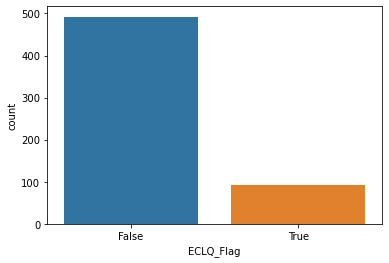

In [694]:
sns.countplot(x=final_table_merged['ECLQ_Flag'])

<AxesSubplot:xlabel='L'>

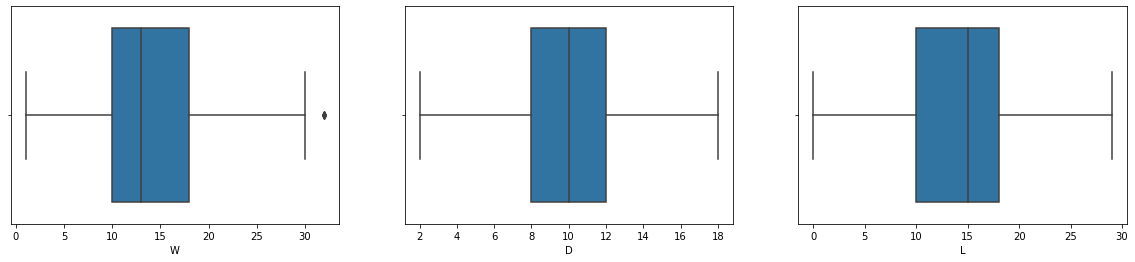

In [695]:
#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
sns.boxplot(x=final_table_merged['W'])
f.add_subplot(1,3,2)
sns.boxplot(x=final_table_merged['D'])
f.add_subplot(1,3,3)
sns.boxplot(x=final_table_merged['L'])

In [696]:
final_table_merged.isnull().sum()

Season               0
Pos                  0
Team                 0
Pld                  0
W                    0
D                    0
L                    0
GF                   0
GA                   0
GD                   0
CS                  80
Pts                  0
ETQ_Name_mapped    492
ECLQ_Flag            0
Team_le              0
dtype: int64

In [697]:
#Save dataset as csv
final_table_merged.to_csv('datasets/temp_chck.csv', index=False)

In [698]:
final_table_merged[final_table_merged['GA'] == -100]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,CS,Pts,ETQ_Name_mapped,ECLQ_Flag,Team_le
21,1993-94,22,Swindon,42,5,15,22,47,-100,-53,4,30,NaN,False,52


In [699]:
Qualifiers = final_table_merged[final_table_merged['ECLQ_Flag'] == True]['Team'].unique()
len(Qualifiers)
print(Qualifiers)

['Man United' 'Blackburn' 'Newcastle' 'Arsenal' 'Chelsea' 'Leeds'
 'Liverpool' 'Everton' 'Tottenham' 'Man City' 'Leicester']


In [700]:
#graphs, Plots & Insights

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Pos'),
  Text(1.5, 0, 'Pld'),
  Text(2.5, 0, 'W'),
  Text(3.5, 0, 'D'),
  Text(4.5, 0, 'L'),
  Text(5.5, 0, 'GF'),
  Text(6.5, 0, 'GA'),
  Text(7.5, 0, 'GD'),
  Text(8.5, 0, 'Pts'),
  Text(9.5, 0, 'ECLQ_Flag'),
  Text(10.5, 0, 'Team_le')])

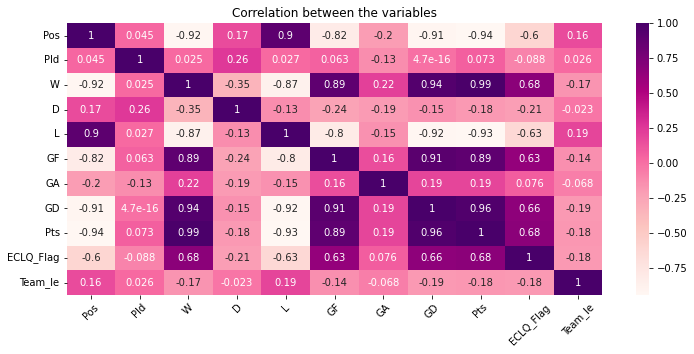

In [701]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
table_correlation=final_table_merged.corr()
sns.heatmap(table_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

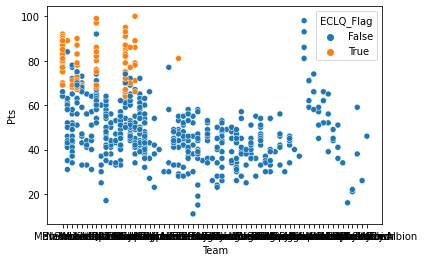

In [702]:
sns.scatterplot(x='Team',
                y='Pts',
                data=final_table_merged,
                hue="ECLQ_Flag")
plt.show()

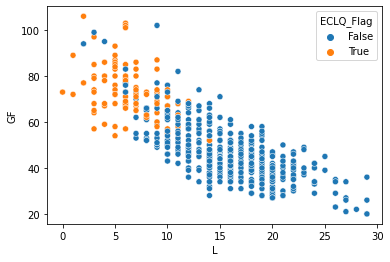

In [703]:
sns.scatterplot(x='L',
                y='GF',
                data=final_table_merged,
                hue="ECLQ_Flag")
plt.show()

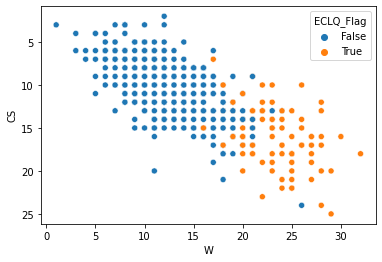

In [704]:
sns.scatterplot(x='W',
                y='CS',
                data=final_table_merged,
                hue="ECLQ_Flag")
plt.show()

In [705]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#from sklearn import svm
#from sklearn.linear_model import LogisticRegression
# import the metrics class

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [722]:
X = final_table_merged[['Team_le', 'W','L']].values
y = final_table_merged['ECLQ_Flag'].values

scaler=MinMaxScaler()
X_minmax = scaler.fit_transform(X)
#print(X_minmax)
#print(y)

In [725]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create a k-NN classifier with 3 neighbors: knn
knn= KNeighborsClassifier(n_neighbors=7,leaf_size=4, p=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#print("Test set predictions: {}".format(y_pred))

# Print the accuracy
print(knn.score(X_test, y_test))
#print(classification_report(y_test, y_pred))

0.9188034188034188


In [726]:
#Validate whether scaling data improves the accuracy 

scaler=MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.fit_transform(X_test)

knn2 = KNeighborsClassifier(n_neighbors=7,leaf_size=4, p=1)
knn2.fit(X_train_minmax, y_train)
print(knn2.score(X_test_minmax, y_test))

0.9316239316239316


In [727]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[186,  10],
       [  9,  29]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

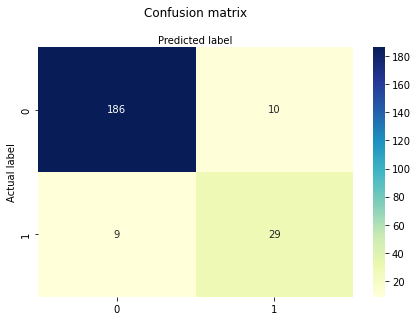

In [728]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

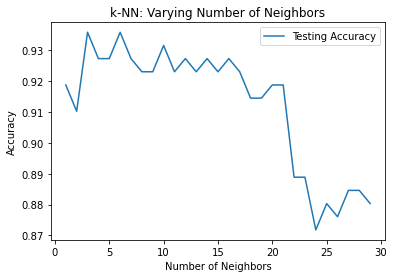

In [729]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

In [730]:
def scale_prediction(my_array):
    my_array_reshaped = np.array(my_array).reshape(1, -1)
    my_array_minmax = scaler.fit_transform(my_array_reshaped)
    return my_array_minmax

def scale_reshape(my_array):
    my_array_reshape = np.array(my_array).reshape(1, -1)
    return my_array_reshape

In [758]:
# 'Team_le', 'GD','L'
# 25 MANC | 41 WHU | 26 MANU

#print(myteam_le('West Ham'))

manc_le = 33
manu_le = 26
wham_le = 58

team_le = 33
est_w = 25
est_l = 10

my_array1 = [manc_le, est_w, est_l]
print(my_array1)
print('Man City: ', knn.predict(scale_reshape(my_array1)))
#print('Man City: ', knn2.predict(scale_prediction(my_array2)))

my_array2 = [wham_le, est_w+10, est_l-10]
print(my_array2)
print('West Ham:', knn.predict(scale_reshape(my_array2)))
#print('West Ham:',knn2.predict(scale_prediction(my_array2)))


[33, 25, 10]
Man City:  [ True]
[58, 35, 0]
West Ham: [False]


In [555]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 4
Best p: 1
Best n_neighbors: 7
